<a href="https://colab.research.google.com/github/hkbu-kennycheng/comp3925/blob/main/lab3_working_with_data_on_the_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab3 Working with data on the web

This lab aims to reenforce your skillsets for working with data on different websites. It covers `requests`, `json`, `pandas`, `seaborn` and `BeautifulSoup`.

In [2]:
!pip install requests pandas seaborn numpy

In [3]:
import requests
import json
import numpy as np
import pandas as pd
import seaborn as sns

# CitySuper

Let's try to search with a keyword, the result URL would be [https://online.citysuper.com.hk/pages/search-results?q=20&page_num=3](https://online.citysuper.com.hk/pages/search-results?q=20&page_num=3).

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9vbmxpbmUuY2l0eXN1cGVyLmNvbS5oay9wYWdlcy9zZWFyY2gtcmVzdWx0cz9xPTIwJnBhZ2VfbnVtPTE=)

## Inspect network connnections

Please open the network inspector with `right-click -> Inspect`. 
![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.zj4FMIImow74LyfZ8pl6-wHaFU%26pid%3DApi&f=1)

If you are using Safari, you may need to enable Develop menu in Preferences.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fappletoolbox.com%2Fwp-content%2Fuploads%2F2013%2F06%2FSAFARI-SHOW-DEVELOP-MENU.jpg&f=1&nofb=1)

After that, you should found a connection with `ultimate-dot-acp-magento.appspot.com/full_text_search` which returning search result in json-like format.

In [4]:
r = requests.get('https://ultimate-dot-acp-magento.appspot.com/full_text_search?q=20&page_num=1&store_id=25978324&UUID=a576ef0e-353e-426c-8673-dbefcd7987b4&cdn_cache_key=1643106142&facets_required=1&callback=ispSearchResult&related_search=1')
r.text

'ispSearchResult({"term":"20","uuid":"a576ef0e-353e-426c-8673-dbefcd7987b4","total_results":3984,"items":[{"p_min_c":"0.00","p_spl":0,"p_c":"0.00","p_max_c":"0.00","p_min":"","v_c":1,"id":"1265886429227","p_max":"","sku":"601012152","iso":false,"vrc":{},"vra":[[12157310992427,[["Barcode",["\\u4ee5\\u8272\\u5217\\u756a\\u837d (20g)"]],["Price",["HKD:7.20"]],["Product-sku",["601012152"]],["Sellable",[true]],["Title",["Default Title"]]]]],"skus":["601012152"],"c":"HKD","d":"Store in cool dry place *Photo for reference only. ","f":0,"t2":"https:\\/\\/assets.instantsearchplus.com\\/thumbs\\/cdn.shopify.com\\/8e3b27ad-3d32-4747-923c-a318e60a8a96","l":"Israeli Parsley  (20g)","p":"7.20","s":"1265886429227::12157310992427","u":"\\/products\\/israel-parsley-300g","t":"https:\\/\\/cdn.shopify.com\\/s\\/files\\/1\\/2597\\/8324\\/products\\/601012152_1_israel_parsley_s_large.jpg?v=1526617483"},{"p_min_c":"0.00","p_spl":0,"p_c":"0.00","p_max_c":"0.00","p_min":"","v_c":1,"id":"1209648513067","p_max"

## Processing JSON data

Then we could clean up leading and trailing string with `lstrip` and `rstrip`. After that, we could successfully process it into a json data.

In [5]:
data = json.loads(r.text.lstrip('ispSearchResult(').rstrip(');'))
print(json.dumps(data,indent=2))



{
  "term": "20",
  "uuid": "a576ef0e-353e-426c-8673-dbefcd7987b4",
  "total_results": 3984,
  "items": [
    {
      "p_min_c": "0.00",
      "p_spl": 0,
      "p_c": "0.00",
      "p_max_c": "0.00",
      "p_min": "",
      "v_c": 1,
      "id": "1265886429227",
      "p_max": "",
      "sku": "601012152",
      "iso": false,
      "vrc": {},
      "vra": [
        [
          12157310992427,
          [
            [
              "Barcode",
              [
                "\u4ee5\u8272\u5217\u756a\u837d (20g)"
              ]
            ],
            [
              "Price",
              [
                "HKD:7.20"
              ]
            ],
            [
              "Product-sku",
              [
                "601012152"
              ]
            ],
            [
              "Sellable",
              [
                true
              ]
            ],
            [
              "Title",
              [
                "Default Title"
              ]
           

In [6]:
for item in data['items']:
  print(item['l'], float(item['p']))

Israeli Parsley  (20g) 7.2
ROYCE' Nama Chocolate - Maccha  (20pcs) 115.0
ROYCE' Nama Chocolate - Mild Cacao  (20pcs) 115.0
ROYCE' Pure Chocolate - Colombia Bitter  (20pcs) 55.0
ROYCE' Pure Chocolate - Mild Bitter  (20pcs) 55.0
ROYCE' Nama Chocolate - Bitter  (20pcs) 115.0
KAMEDA Rice Cracker - Sweet Soy Sauce  (20pcs) 27.0
LES FRERES MARCHAND Comte AOP Grande Garde Cheese - 20-24 Months  (100g) 71.0
EMBORG UHT Cooking Cream 20%  (200mL) 25.0
ROYCE' Nama Chocolate - Au Lait  (20pcs) 115.0
JAMONES DE SERON T.S.G Serrano Ham - 20 Months  (100g) 101.0
ROYCE' R Chocolate  (20pcs) 115.0
TRADITIONAL MEDICINALS Organic Chamomile Tea Bags  (20.8g) 58.0
S-TRUST Shizuoka Matcha Sweets Prime Collection Gift Box  (20pcs) 88.0
ROYCE' Pure Chocolate - Extra Bitter  (20pcs) 55.0
ROYCE' Pure Chocolate - Venezuela Bitter  (20pcs) 55.0
ROYCE' Nama Chocolate - White  (20pcs) 115.0
NESTLE Krematop Coffee Creamer - Ordinary  (20 x 4.3mL) 20.0
NERABESTBIOTECH Anti-Germ Wet Wipes 20'S 10.0
CLOUDY BAY Sauvigno

In fact, omitting `callback=ispSearchResult` parameter in URL would resturn an valid json result.

In [7]:
r = requests.get('https://ultimate-dot-acp-magento.appspot.com/full_text_search?q=meat&page_num=1&store_id=25978324&UUID=a576ef0e-353e-426c-8673-dbefcd7987b4&cdn_cache_key=1643106142&facets_required=1&related_search=1')
r.json()

{'alternatives': [],
 'auto_facets': False,
 'facets': [],
 'facets_completed': False,
 'isp_quick_view_mode': 0,
 'items': [{'c': 'HKD',
   'd': 'Keep refrigerated *Photo for reference only. ',
   'f': 0,
   'id': '4497896865835',
   'iso': False,
   'l': 'Canadian White Sea Cucumber Meat [Previously Frozen]  (200g)',
   'p': '160.00',
   'p_c': '0.00',
   'p_max': '',
   'p_max_c': '0.00',
   'p_min': '',
   'p_min_c': '0.00',
   'p_spl': 0,
   's': '4497896865835::31912977825835',
   'sku': '601030946',
   'skus': ['601030946'],
   't': 'https://cdn.shopify.com/s/files/1/2597/8324/products/601030946-1_large.jpg?v=1609122602',
   't2': 'https://lh3.googleusercontent.com/umPh_4jbf_YZiD_qR95IN7RhLdSPw8sOQHwbv-fIOFXpvXtBIwSpIZeY8-Xfq_Xog8Dnv_mMrYf1BtPWKNgTMTei1wwqUeFBntMeQQ',
   'u': '/products/no-brand-canadian-white-sea-cucumber-meat-previously-frozen-601030946',
   'v_c': 1,
   'vra': [[31912977825835,
     [['Barcode', ['加拿大桂花蚌 [經解凍處理] (200g)']],
      ['Price', ['HKD:160.00']],
   

## Let's pack it in a function

In [8]:
def searchCitySuperWithPaging(keyword, pageNum = 1):
  r = requests.get(f'https://ultimate-dot-acp-magento.appspot.com/full_text_search?q={keyword}&page_num={pageNum}&store_id=25978324&UUID=a576ef0e-353e-426c-8673-dbefcd7987b4&cdn_cache_key=1643106142&facets_required=1&related_search=1')
  json_data = r.json()
  return json_data['items'], json_data['total_results']

items, total_items = searchCitySuperWithPaging('20',1)
total_items


3984

In [9]:
def citySuperItemToDf(item):
  return pd.DataFrame([{'name':item['l'], 'price':float(item['p'])}])

def searchCitySuper(keyword):
  perPage = 10
  df = pd.DataFrame(columns=['name','price'])
  items, total = searchCitySuperWithPaging(keyword)

  if total == 0:
    return

  for item in items:
    df = df.append(citySuperItemToDf(item), ignore_index=True)
  
  for i in range(2, total // perPage + 1):
    items, _ = searchCitySuperWithPaging(keyword, i)
    for item in items:
      df = df.append(citySuperItemToDf(item), ignore_index=True)

  return df

In [10]:
fishdf = searchCitySuper('fish')
fishdf.head(100)

,name,price
0,Canadian Black Cod Fish Kirimi [Previously Fro...,195.0
1,IRVINS Salted Egg Fish Skin (Small) (105g),55.0
2,KAYANOYA Dried Sardine Fish Soup Stock (40g),44.0
3,IRVINS Salted Egg Fish Skin (Large) (230g),110.0
4,KUBARASHOUYU Sukiyaki Style Flying Fish Stock ...,32.0
...,...,...
95,MARUTAI Nagasaki Ramen Noodle - Flying Fish & ...,25.0
96,CITYSUPER Dried Shredded Ipponzuri Bonito Fish...,68.0
97,KANETETSU Assorted Rilakkuma Shaped Steamed Fi...,20.0
98,NINBEN Kaoruajidashi Soup Stock - Bonito Fish ...,58.0


## Feature extraction

In [11]:
fishdf['name'] = fishdf['name'].str.lower()

fishdf['australian'] = fishdf['name'].str.count('austra')
fishdf['japanese'] = fishdf['name'].str.count('japan')
fishdf['canadian'] = fishdf['name'].str.count('canad')
fishdf['cheese'] = fishdf['name'].str.count('cheese')
fishdf['organic'] = fishdf['name'].str.count('organic')

fishdf['egg'] = fishdf['name'].str.count('egg')

fishdf['large'] = fishdf['name'].str.count('large')
fishdf['small'] = fishdf['name'].str.count('small')

fishdf['soup'] = fishdf['name'].str.count('soup')
fishdf['cake'] = fishdf['name'].str.count('cake')
fishdf['sauce'] = fishdf['name'].str.count('sau')
fishdf['crab'] = fishdf['name'].str.count('crab')

fishdf['fish'] = fishdf['name'].str.count('fish')


fishdf

,name,price,australian,japanese,canadian,cheese,organic,egg,large,small,soup,cake,sauce,crab,fish
0,canadian black cod fish kirimi [previously fro...,195.0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,irvins salted egg fish skin (small) (105g),55.0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,kayanoya dried sardine fish soup stock (40g),44.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,irvins salted egg fish skin (large) (230g),110.0,0,0,0,0,0,1,1,0,0,0,0,0,1
4,kubarashouyu sukiyaki style flying fish stock ...,32.0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,china organic baby choi sum (300g),31.0,0,0,0,0,1,0,0,0,0,0,0,0,0
287,citysuper spanish iberico pork set for sukiyak...,173.0,0,0,0,0,0,0,0,0,0,0,0,0,0
288,hakataya soft tofu - large (1pc),22.0,0,0,0,0,0,0,1,0,0,0,0,0,0
289,tempo box facial neutral 5 boxes,44.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
fishdf['australian'] = fishdf['australian'].clip(upper=1)
fishdf['japanese'] = fishdf['japanese'].clip(upper=1)
fishdf['canadian'] = fishdf['canadian'].clip(upper=1)
fishdf['cheese'] = fishdf['cheese'].clip(upper=1)
fishdf['organic'] = fishdf['organic'].clip(upper=1)

fishdf['egg'] = fishdf['egg'].clip(upper=1)

fishdf['large'] = fishdf['large'].clip(upper=1)
fishdf['small'] = fishdf['small'].clip(upper=1)

fishdf['soup'] = fishdf['soup'].clip(upper=1)
fishdf['cake'] = fishdf['cake'].clip(upper=1)
fishdf['sauce'] = fishdf['sauce'].clip(upper=1)
fishdf['crab'] = fishdf['crab'].clip(upper=1)

fishdf['fish'] = fishdf['fish'].clip(upper=1)

In [13]:
print('australian', fishdf['australian'].sum())
print('japanese', fishdf['japanese'].sum())
print('canadian', fishdf['canadian'].sum())

print('organic', fishdf['organic'].sum())
print('fish', fishdf['fish'].sum())

australian 10
japanese 36
canadian 8
organic 44
fish 128


## Visualize data

### Heatmap

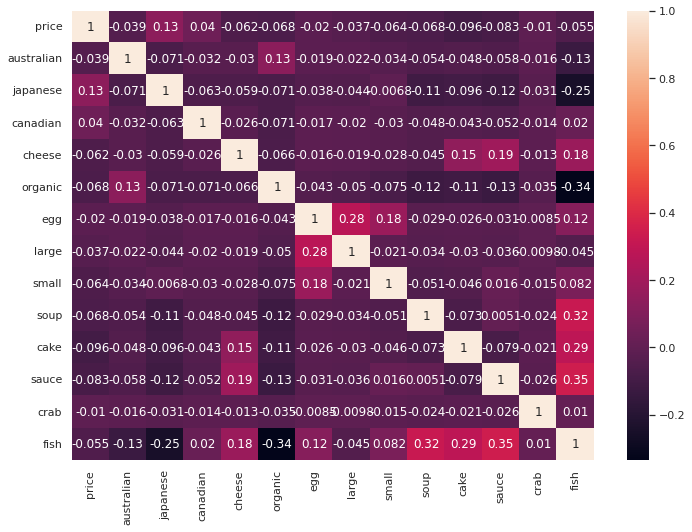

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(fishdf.corr(), annot=True)

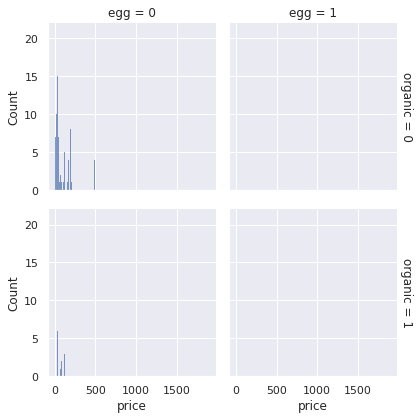

In [15]:
sns.displot(
    fishdf, x="price", col="egg", row="organic",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

### WordCloud

In [16]:
!pip install wordcloud

In [17]:
words = ' '.join(fishdf['name'].tolist())

In [18]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(words)

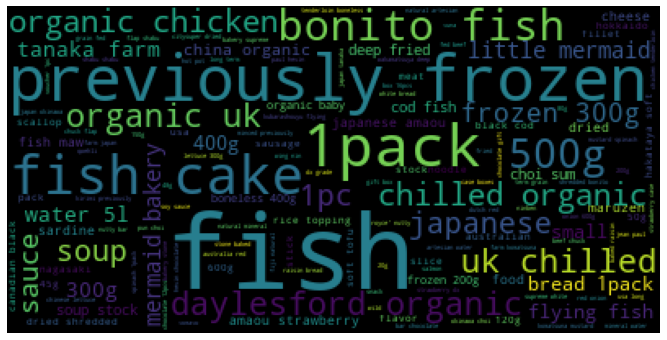

In [19]:
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Execrise

Please create more feature by looking at the word cloud above. After that, plot some graphs to visualize it.

# ParknShop - parsing HTML data with BeautifulSoup

[https://www.parknshop.com/en/](https://www.parknshop.com/en/)


In [20]:
!pip install beautifulsoup4

from bs4 import BeautifulSoup

In [21]:
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:95.0) Gecko/20100101 Firefox/95.0',
}

r = requests.get('https://www.parknshop.com/search?code=ALL&page=1&resultsForPage=10&text=0s&sort=&category2nd=0&category3rd=0&_=1643164108695', headers=headers)
r.text

'<!DOCTYPE html>\n<html xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://ogp.me/ns/fb#" class="no-js" lang="en">\n\n<head>\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<input type="hidden" value="false" id="isBridgewellGTMEnabled"/>\n<input type="hidden" value="" id="bridgewellGoogleTagManagerPID"/>\n<title>\n\t\t\t\t\t\tSearch Result: 0s | PARKnSHOP.com</title>\n\t\t\t<meta charset="utf-8">\n<meta name="apple-mobile-web-app-title" content=".com.hk" />\n<meta name="HandheldFriendly" content="True" />\n<meta name="MobileOptimized" content="970" />\n<meta name="viewport" content="width=device-width, minimal-ui, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=yes">\n\t<meta name="ipaddress" content="182" />\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="description" content="Search and buy online for 0s products at PARKnSHOP. Shop 0s and check lowest prices, discount, delivery offers." />\n<meta na

## Select HTML data using CSS selector

[https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors#basic_selectors](https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors#basic_selectors)

![](https://url2img-web.herokuapp.com/aHR0cHM6Ly9kZXZlbG9wZXIubW96aWxsYS5vcmcvZW4tVVMvZG9jcy9XZWIvQ1NTL0NTU19TZWxlY3RvcnMjYmFzaWNfc2VsZWN0b3Jz)

In [22]:
soup = BeautifulSoup(r.text)
elements = soup.select(".product-container .item .name .text") # select product name using CSS selector

In [23]:
pnk_total = int(soup.select_one('.search-result-title-container .totalNumber').text)
pnk_total

1594

In [24]:
elements = soup.select(".product-container > .item")
print(elements[0].select_one('.name .text').text, elements[0].select_one('.discount').text)

Women Dispo. Brief 14s Free HK$25.90


In [26]:
pnkItems = [{'name':e.select_one('.name .text').text.strip(),'price':float(e.select_one('.discount').text.strip().lstrip('HK$'))} for e in elements]
pnkItems

ValueError: ignored

## Execrise

Please pack the code in a function returning a pandas `DataFrame` like what we done as `searchCitySuper`. After that, please do some basic analysis using the dataset.